In [1]:
!pip install pycryptodome
!pip install matplotlib

import os
import gc
import time
import torch
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib

run_simulation = False  # Set this to True when you want to run the simulation

# Clear PyTorch's cache
torch.cuda.empty_cache()

# Print GPU information
print("\n" + "="*40)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(device_lib.list_local_devices())
print("="*40 + "\n")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.5 MB/s eta 0:00:00

Num GPUs Available:  1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13132685644199217188
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 13854638080
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3901814951249416246
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]



In [2]:
!git clone https://github.com/tommysmithgit/VBFLreport
%cd /content/VBFLreport/

Cloning into 'VBFLreport'...
remote: Enumerating objects: 47, done.
remote: Total 47 (delta 0), reused 0 (delta 0), pack-reused 47
Receiving objects: 100% (47/47), 54.85 MiB | 35.08 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/VBFLreport


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

# Name for VBFL share folder
vbflshare = '/content/drive/My Drive/VBFL'

Mounted at /content/drive/


Running simulation for 120 seconds, dtx: 0
The process ran for 120.1875422000885 seconds.


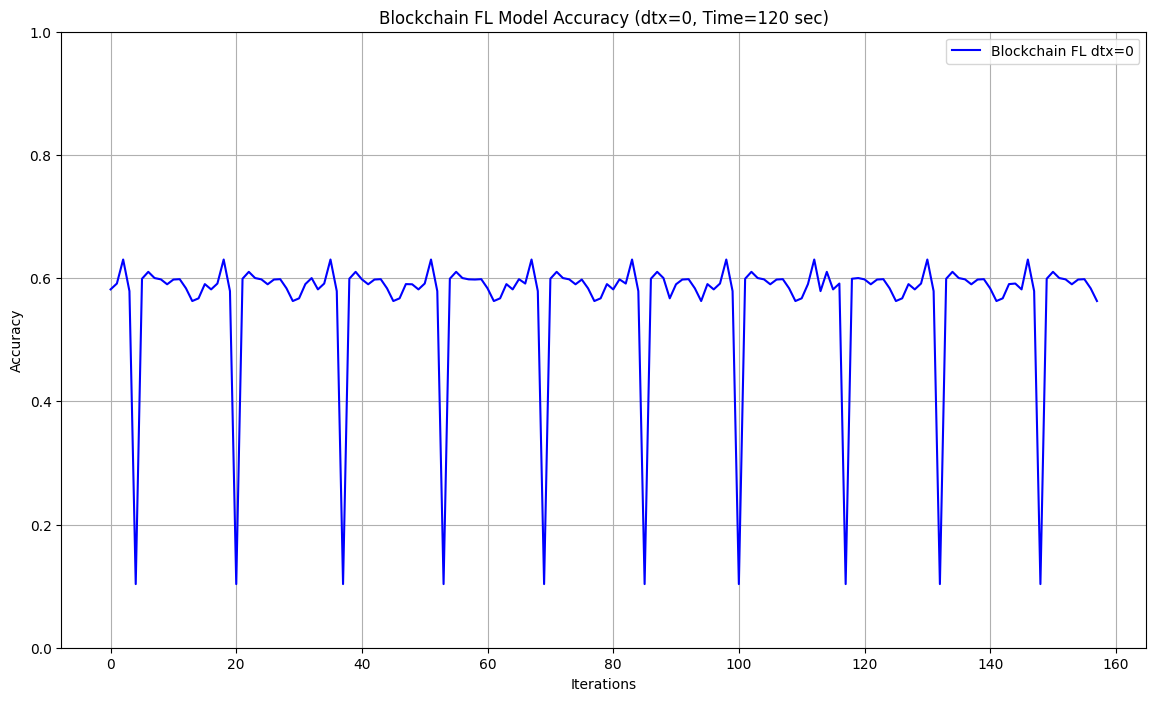

Files Blockchain2_dtx0.txt and Blockchain2_dtx0.png successfully copied to shared folder.
Running simulation for 120 seconds, dtx: 1
The process ran for 117.25333499908447 seconds.


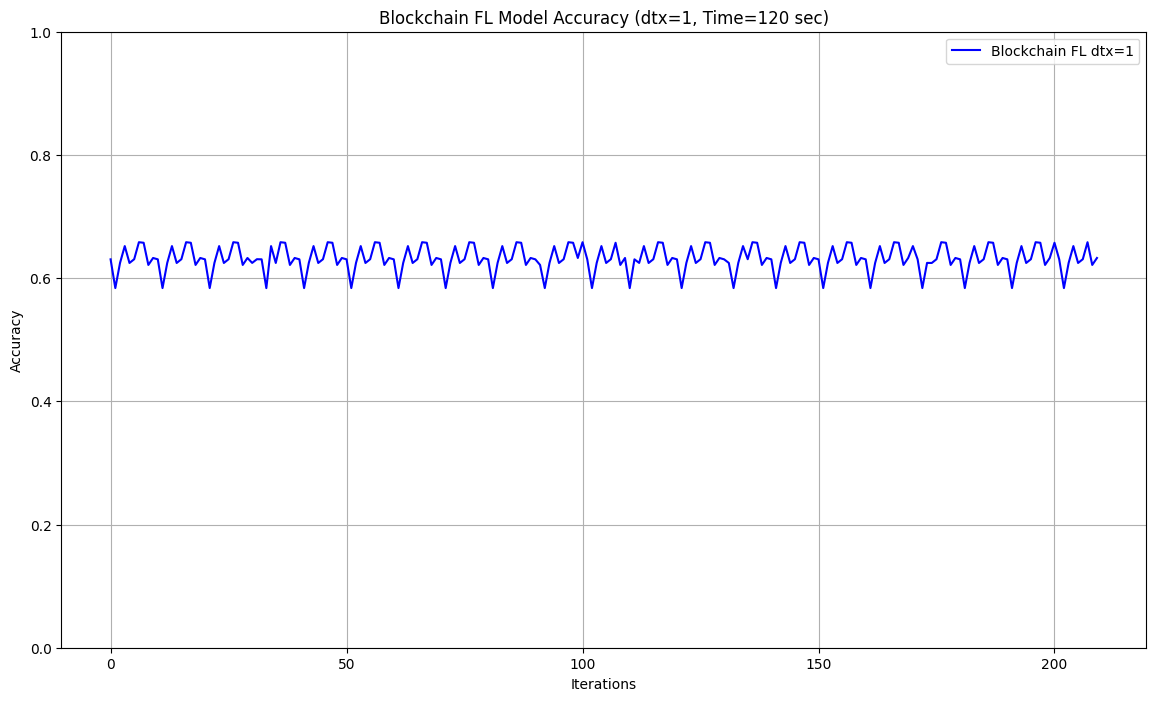

Files Blockchain2_dtx1.txt and Blockchain2_dtx1.png successfully copied to shared folder.
Running simulation for 300 seconds, dtx: 0
The process ran for 132.02143478393555 seconds.


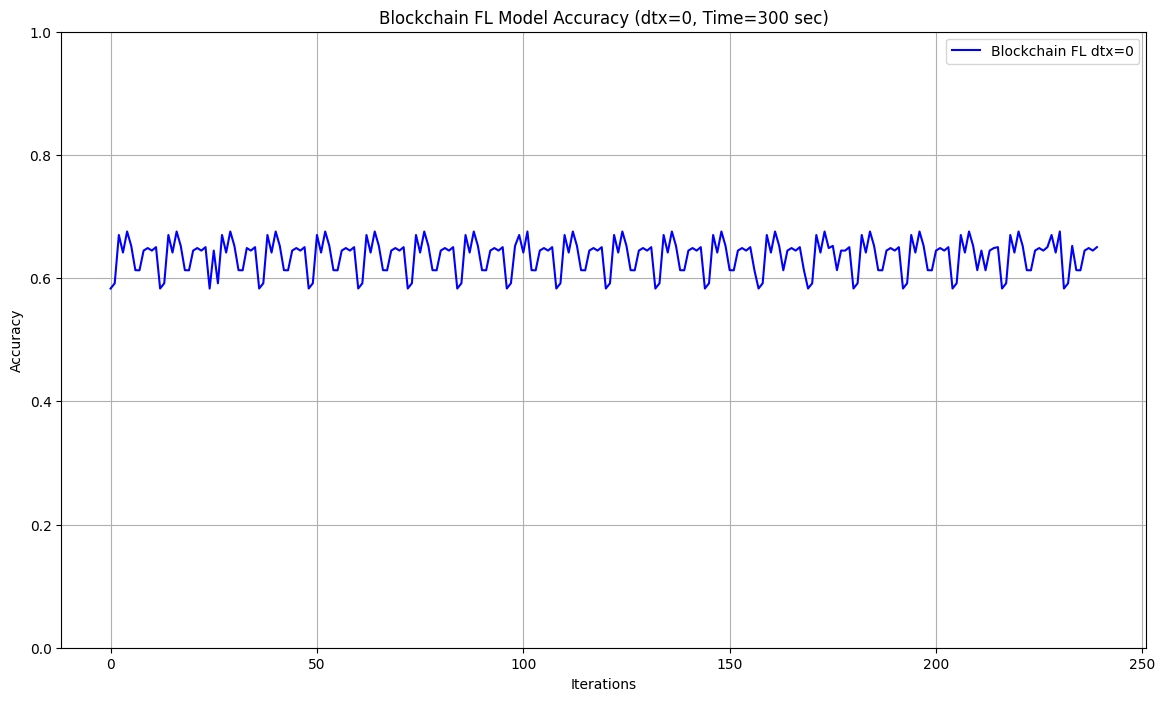

Files Blockchain5_dtx0.txt and Blockchain5_dtx0.png successfully copied to shared folder.
Running simulation for 300 seconds, dtx: 1
The process ran for 147.34207344055176 seconds.


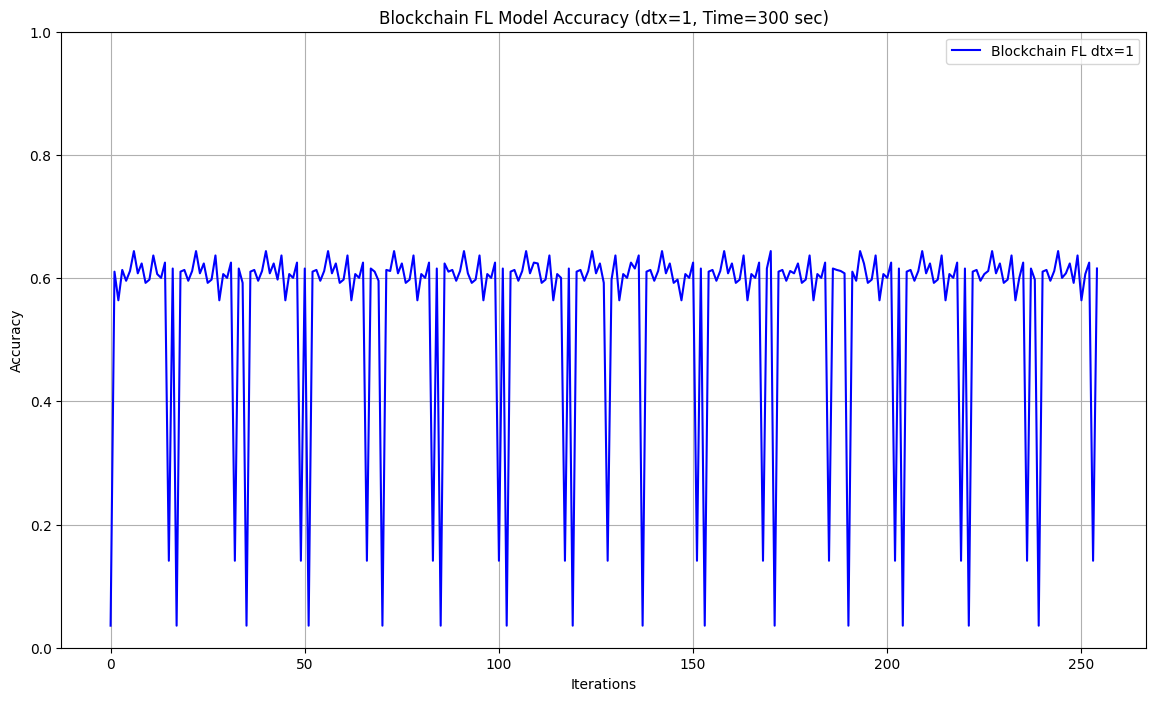

Files Blockchain5_dtx1.txt and Blockchain5_dtx1.png successfully copied to shared folder.


In [4]:
import os
import time
import matplotlib.pyplot as plt

# Parameters for the notebook
model_type = "Blockchain"
parameter_to_test = "dtx"
parameter_values = {
    "vh": ["0.02", "0.1"],
    "pow": ["0", "1"],
    "ha": ["*,*,*", "12,5,3"],
    "dtx": ["0", "1"],
    # Add other parameters as needed
}
time_limits = ["120", "300"]  # Corresponds to 2 and 5 minutes

# Choose the parameter values to use for this run
current_values = parameter_values[parameter_to_test]

# Function to extract accuracies from the output files
def extract_accuracies(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    accuracies = []
    for line in lines:
        if "model accuracy becomes" in line:
            accuracy_value = float(line.split("model accuracy becomes -")[1].strip())
            accuracies.append(accuracy_value)
    return accuracies

# Function to run simulations and plot results
def run_simulations_and_plot(model_type, parameter, values, time_limits):
    for time_limit in time_limits:
        for value in values:
            output_file_pattern = "{model}{time}_{param}{value}.txt"
            image_file_pattern = "{model}{time}_{param}{value}.png"

            output_file = output_file_pattern.format(
                model=model_type,
                time=int(time_limit)//60,
                param=parameter,
                value=value
            )
            image_file = image_file_pattern.format(
                model=model_type,
                time=int(time_limit)//60,
                param=parameter,
                value=value
            )

            print(f"Running simulation for {time_limit} seconds, {parameter}: {value}")

            # Record the start time
            start_time = time.time()

            # Run the VBFL simulation for Blockchain Model
            command = f"timeout {time_limit}s python main.py -nd 50 -max_ncomm 100 -ha *,*,* -aio 1 -pow 0 -ko 6 -nm 3 -vh 0.15 -cs 0 -B 10 -mn mnist_cnn -iid 1 -lr 0.005 -dtx {value} > {output_file}"
            os.system(command)

            # Record the end time and calculate the duration
            end_time = time.time()
            duration = end_time - start_time
            print(f"The process ran for {duration} seconds.")

            # Plot the accuracies for the current model
            accuracies = extract_accuracies(output_file)
            if accuracies:
                plt.figure(figsize=(14, 8))
                plt.plot(accuracies, label=f'{model_type} FL {parameter}={value}', color='Blue')
                plt.title(f'{model_type} FL Model Accuracy ({parameter}={value}, Time={time_limit} sec)')
                plt.xlabel('Iterations')
                plt.ylabel('Accuracy')
                plt.ylim([0, 1])
                plt.legend()
                plt.grid(True)
                plt.savefig(image_file)
                plt.show()

                # Copy both the output text file and the image file to the shared Google Drive folder
                os.system(f"cp {output_file} {image_file} '{vbflshare}/'")
                print(f"Files {output_file} and {image_file} successfully copied to shared folder.")
            else:
                print("No accuracies to plot for the current simulation.")

# Run the simulations and plot
run_simulations_and_plot(model_type, parameter_to_test, current_values, time_limits)